## Importing Libraries

In [1]:
import csv
import json
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Loading

In [2]:
path = 'IRIS.csv'

In [4]:
iris = pd.read_csv(path)

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Exploration

In [6]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [7]:
iris.shape

(150, 5)

In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
iris.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

## Data Cleaning

In [11]:
# checking if there are any missing values

In [10]:
missing_values = iris.isnull().sum()
print(missing_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Feature Engineering

In [15]:
iris['sepal_length_width_ratio'] = iris['sepal_length'] / iris['sepal_width']
iris['petal_length_width_ratio'] = iris['petal_length'] / iris['petal_width']

In [16]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_width_ratio,petal_length_width_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,1.457143,7.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,1.633333,7.000000
2,4.7,3.2,1.3,0.2,Iris-setosa,1.468750,6.500000
3,4.6,3.1,1.5,0.2,Iris-setosa,1.483871,7.500000
4,5.0,3.6,1.4,0.2,Iris-setosa,1.388889,7.000000
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.233333,2.260870
146,6.3,2.5,5.0,1.9,Iris-virginica,2.520000,2.631579
147,6.5,3.0,5.2,2.0,Iris-virginica,2.166667,2.600000
148,6.2,3.4,5.4,2.3,Iris-virginica,1.823529,2.347826


## Visualizing the Data

C:\Users\DELL\AppData\Local\Temp\ipykernel_5332\2205300439.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = iris.corr()


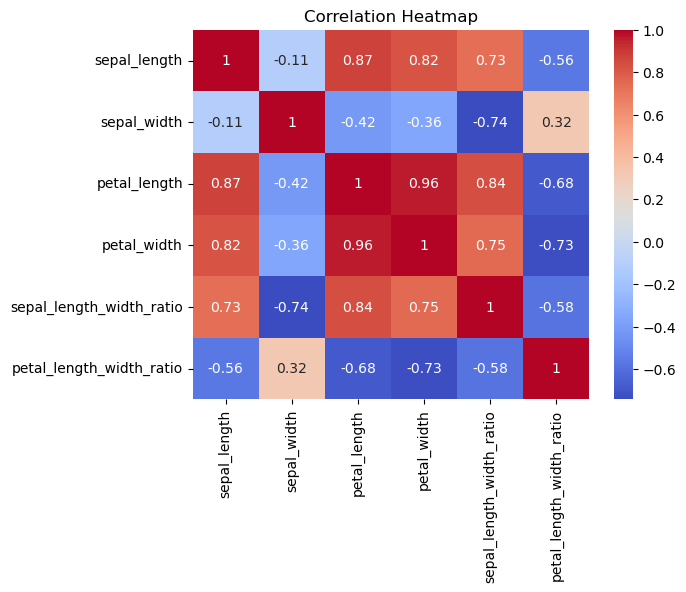

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = iris.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# Separate features and target  
data = iris.values
X = data[:,0:4]
Y = data[:,4]

In [30]:
# Calculate average of each features for all classes
Y_iris = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_iris_reshaped = Y_iris.reshape(4, 3)
Y_iris_reshaped = np.swapaxes(Y_iris_reshaped, 0, 1)
X_axis = np.arange(len(iris.columns)-1)
width = 0.25

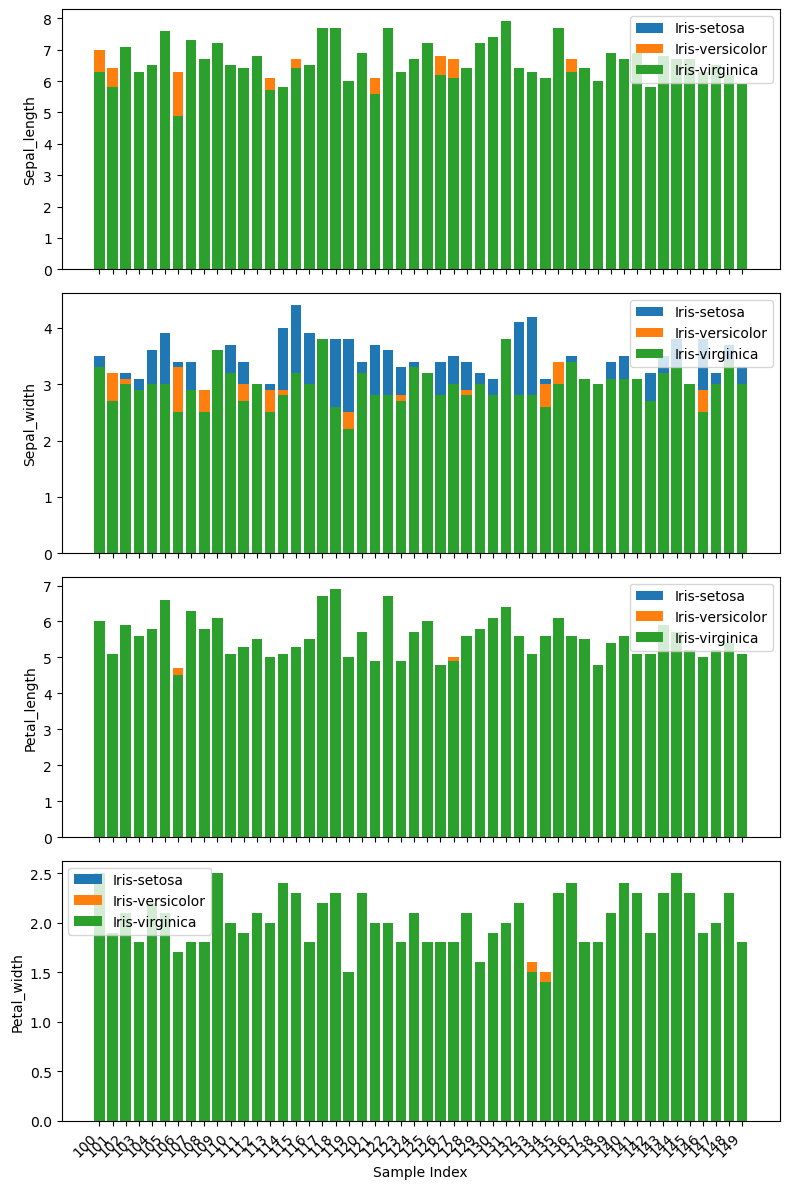

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = iris['species'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over features
for i, feature in enumerate(features):
    # Plot bars for each species
    for specie in species:
        subset_data = iris[iris['species'] == specie]
        x_positions = np.arange(len(subset_data))
        axes[i].bar(x_positions, subset_data[feature], label=specie)

    # Set labels and title for each subplot
    axes[i].set_ylabel(feature.capitalize())
    axes[i].set_xticks(np.arange(len(subset_data)))
    axes[i].set_xticklabels(subset_data.index, rotation = 45, ha = 'right')
    axes[i].legend()

# Set common xlabel
plt.xlabel("Sample Index")
plt.tight_layout()
plt.show()


## Model Training

In [40]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [41]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

## Model Evaluation

In [42]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

## Testing the Model

In [43]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [44]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)